In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile do PR

In [2]:
gdf = gpd.read_file('Shapes/PR/41SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17691 entries, 0 to 17690
Data columns (total 14 columns):
ID            17691 non-null int64
CD_GEOCODI    17691 non-null object
TIPO          17691 non-null object
CD_GEOCODB    6335 non-null object
NM_BAIRRO     6335 non-null object
CD_GEOCODS    17691 non-null object
NM_SUBDIST    3697 non-null object
CD_GEOCODD    17691 non-null object
NM_DISTRIT    17691 non-null object
CD_GEOCODM    17691 non-null object
NM_MUNICIP    17691 non-null object
NM_MICRO      17691 non-null object
NM_MESO       17691 non-null object
geometry      17691 non-null object
dtypes: int64(1), object(13)
memory usage: 1.9+ MB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para PR

In [8]:
dados = pd.read_csv('Planilhas/PR/CSV/Basico_PR.csv',sep =';')

In [9]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(17465, 13)

In [10]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,410010305000001,298.0,844.0,"2,83","1,85","1039,68","3931596,86","1087,11","4059827,51","719,46","1885006,05","892,37","2184241,66"
1,410010305000002,302.0,881.0,"2,92","1,78","1207,89","1813457,79","1236,55","1821073,16","781,19","1393035,45","1112,13","1615532,38"
2,410010305000003,398.0,1228.0,"3,09","2,39","639,27","2169297,29","823,4","2644036,69","419,55","1305734,95","688,48","1958546,46"
3,410010305000004,290.0,898.0,"3,1","2,19","603,05","247235,24","657,46","233718,39","404,48","195659,39","573,14","180553,07"
4,410010305000005,320.0,1021.0,"3,19","1,82","750,98","274029,3","777,72","262956,98","489,13","230708,13","634,51","207001,24"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [11]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [12]:
pr = pd.merge(gdf,dados, on='CD_GEOCODI')

In [13]:
pr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17465 entries, 0 to 17464
Data columns (total 26 columns):
ID            17465 non-null int64
CD_GEOCODI    17465 non-null int64
TIPO          17465 non-null object
CD_GEOCODB    6256 non-null object
NM_BAIRRO     6256 non-null object
CD_GEOCODS    17465 non-null object
NM_SUBDIST    3646 non-null object
CD_GEOCODD    17465 non-null object
NM_DISTRIT    17465 non-null object
CD_GEOCODM    17465 non-null object
NM_MUNICIP    17465 non-null object
NM_MICRO      17465 non-null object
NM_MESO       17465 non-null object
geometry      17465 non-null object
V001          17436 non-null float64
V002          17436 non-null float64
V003          17436 non-null object
V004          17436 non-null object
V005          17436 non-null object
V006          17436 non-null object
V007          17429 non-null object
V008          17429 non-null object
V009          17465 non-null object
V010          17465 non-null object
V011          17461 no

In [14]:
del gdf
del dados

Text(0.5,1,'PARANÁ - PR')

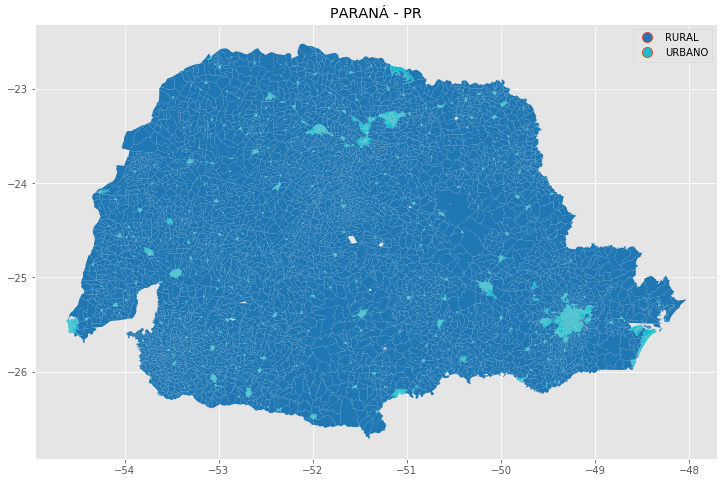

In [15]:
plt.style.use('ggplot')
pr.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('PARANÁ - PR')

# Utilizando a projeção de Albers para calcular as áreas

In [16]:
pr['AREA'] = pr.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [20]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [21]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [22]:
areas_urbanas_pr_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='PR']
del areas_urbanas_br_15

In [24]:
areas_urbanas_pr_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
1782,Goioxim,PR,2.020,4108650.0,POLYGON ((-51.99299811556737 -25.1889366599300...,2.019254
2338,CalifÃ³rnia,PR,1.423,4103503.0,(POLYGON ((-51.35821373456019 -23.660331446044...,1.422744
2391,AbatiÃ¡,PR,2.960,4100103.0,POLYGON ((-50.32248109130636 -23.3014377649132...,2.959628
2392,AdrianÃ³polis,PR,0.840,4100202.0,(POLYGON ((-48.99044097888621 -24.665632784015...,0.839954
2393,Agudos do Sul,PR,2.764,4100301.0,(POLYGON ((-49.31095146358785 -26.099207869169...,2.763601


In [26]:
areas_urbanas_pr_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_pr_15['CD_GEOCODM']=areas_urbanas_pr_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_pr_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 399 entries, 1782 to 2802
Data columns (total 6 columns):
Municipio     399 non-null object
UF            399 non-null object
Area_Urb      399 non-null float64
CD_GEOCODM    399 non-null int64
geometry      399 non-null object
Area          399 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.8+ KB


In [27]:
pr.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no PR')

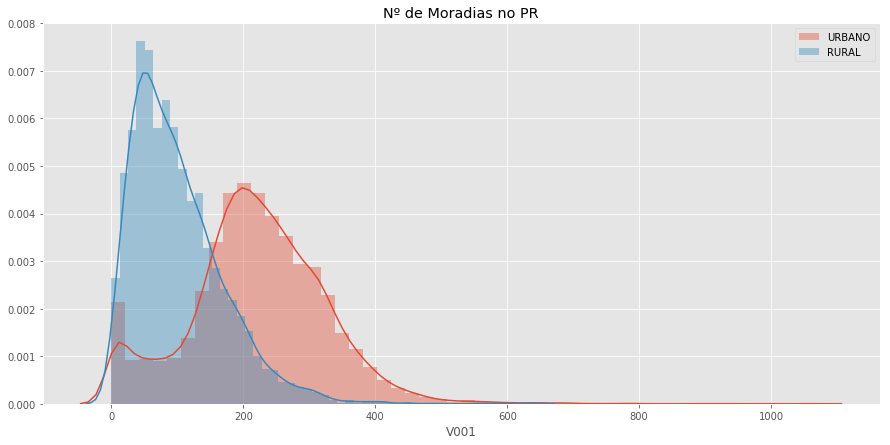

In [28]:
plt.style.use('ggplot')
pr['V001'] = pd.to_numeric(pr['V001'])
pr['V002'] = pd.to_numeric(pr['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(pr[pr['TIPO'] =='URBANO']['V001'])
sns.distplot(pr[pr['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no PR')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',pr[pr['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',pr[pr['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    4582.000000
mean      100.285028
std        68.833927
min         0.000000
25%        49.000000
50%        86.000000
75%       137.000000
max       633.000000
Name: V001, dtype: float64
URBANO 
 count    12883.000000
mean       220.373515
std        103.233375
min          0.000000
25%        162.000000
50%        219.000000
75%        284.000000
max       1060.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

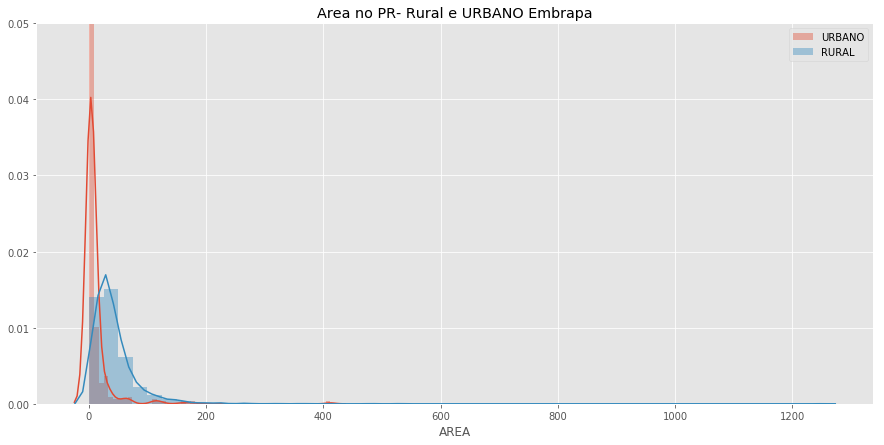

In [30]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_pr_15['Area'])
plt.legend(['URBANO'])
sns.distplot(pr[pr['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no PR- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [31]:
pr['Densidade Moradias'] = pr.V001/pr.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

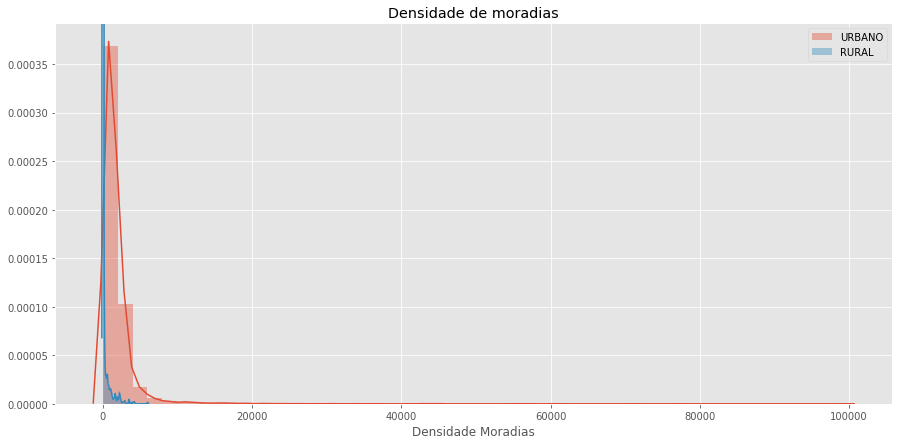

In [32]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(pr[pr['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(pr[pr['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [33]:
print('RURAL','\n',pr[pr['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',pr[pr['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    4582.000000
mean       44.265460
std       274.359357
min         0.000000
25%         1.344196
50%         2.592347
75%         4.844657
max      5973.990012
Name: Densidade Moradias, dtype: float64
URBANO 
 count    12883.000000
mean      1718.725703
std       2884.737211
min          0.000000
25%        565.678807
50%       1191.731887
75%       2067.355053
max      99367.380393
Name: Densidade Moradias, dtype: float64


In [35]:
pr[(pr['TIPO']=='RURAL')&(pr['Densidade Moradias']>pr['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000
mean,15343.962025,4.116761e+14,174.139241,593.873418,0.115012,1810.320469
std,4284.677669,6.438069e+11,74.519957,269.452263,0.062716,986.742470
min,4411.000000,4.101408e+14,42.000000,135.000000,0.007030,766.126438
25%,14276.000000,4.114302e+14,124.000000,404.500000,0.067567,1052.206576
50%,17329.000000,4.119509e+14,165.000000,561.000000,0.099694,1616.378581
75%,17357.500000,4.119509e+14,217.000000,748.500000,0.148590,2223.679315
max,21432.000000,4.128708e+14,400.000000,1286.000000,0.313609,5973.990012


## Descrição da área por setor censitários urbanos e rurais

In [36]:
print('URBANO','\n',areas_urbanas_pr_15['Area'].describe())
print('RURAL','\n',pr[pr['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    399.000000
mean       9.485991
std       27.676076
min        0.339519
25%        1.591836
50%        3.106456
75%        6.494633
max      412.003917
Name: Area, dtype: float64
RURAL 
 count    4582.000000
mean       41.803868
std        42.525306
min         0.007030
25%        19.250182
50%        32.488998
75%        52.294244
max      1249.544063
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

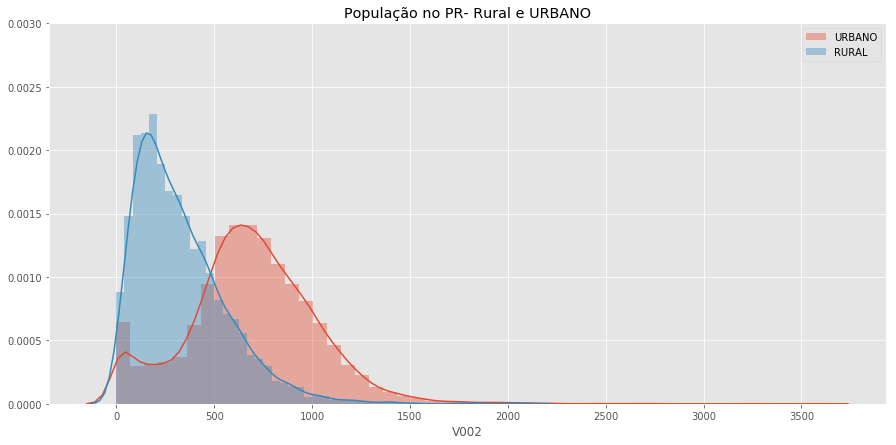

In [37]:
fig = plt.figure(figsize = (15,7))

sns.distplot(pr[pr['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(pr[pr['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no PR- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [38]:
print('RURAL','\n',pr[pr['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',pr[pr['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    4582.000000
mean      330.323876
std       235.392738
min         0.000000
25%       155.000000
50%       279.000000
75%       454.000000
max      2088.000000
Name: V002, dtype: float64
URBANO 
 count    12883.000000
mean       689.020958
std        330.922201
min          0.000000
25%        501.000000
50%        682.000000
75%        888.000000
max       3588.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [40]:
max_area = areas_urbanas_pr_15['Area'].mean() 
min_pop =  pr[pr['TIPO']=='URBANO']['V002'].mean()
min_mor =  pr[pr['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = pr[pr['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [41]:
scrcu = pr[(pr.TIPO=='RURAL')&(pr.V001 >= min_mor)&(pr.AREA <= max_area)&(pr.V002>= min_pop)\
           &(pr['Densidade Moradias']>= min_densidade_moradias)]

In [42]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,15258.000000,4.116844e+14,272.142857,952.666667,0.217754,1546.972215
std,4236.760484,6.104727e+11,49.220205,182.303959,0.111178,749.219743
min,5882.000000,4.104204e+14,223.000000,693.000000,0.078307,568.734161
25%,14501.000000,4.114807e+14,230.000000,787.000000,0.148072,1046.704524
50%,17330.000000,4.119509e+14,259.000000,925.000000,0.184596,1430.969875
75%,17357.000000,4.119509e+14,291.000000,1060.000000,0.234365,2080.073927
max,20361.000000,4.126603e+14,400.000000,1286.000000,0.498635,3473.507693


Text(0.5,1,'SCRCU - Por Município')

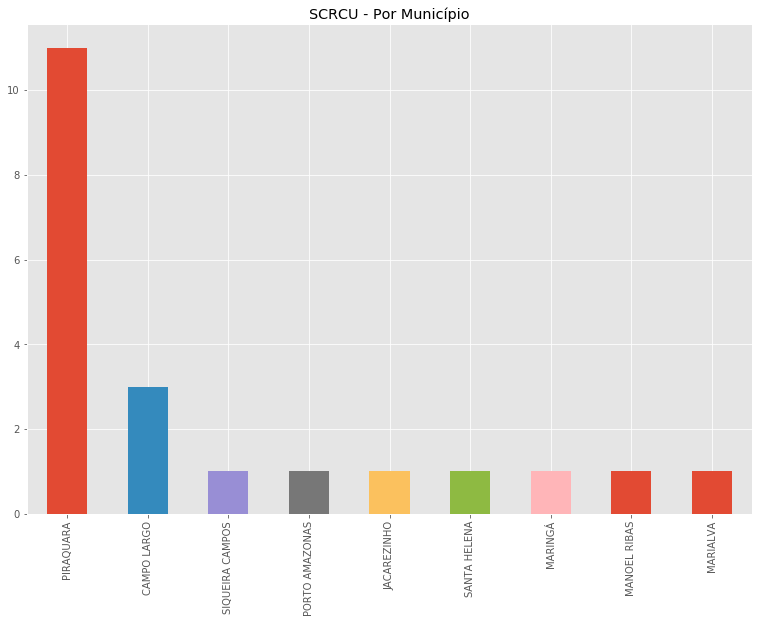

In [43]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de RJ - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


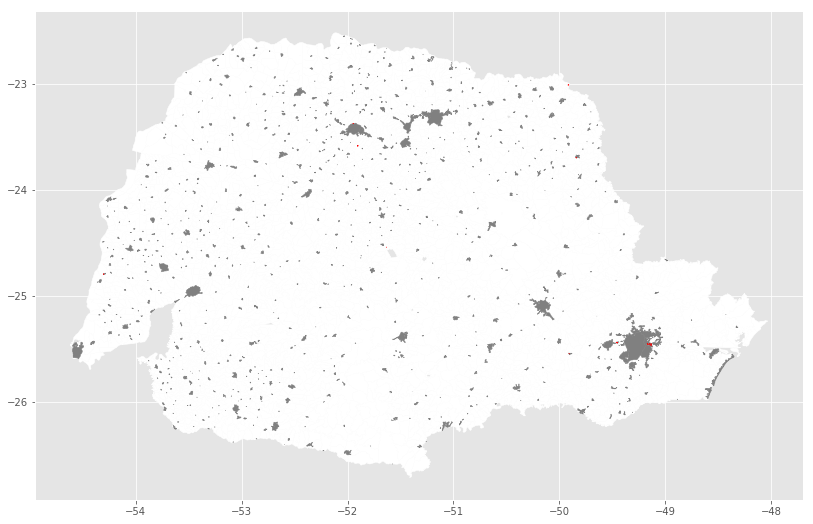

In [44]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
pr.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_pr_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [188]:
areas_urbanas_pr_15.rename(columns={'Area':'AREA'},inplace = True)

In [45]:
fonte = np.zeros(areas_urbanas_pr_15.shape[0])
areas_urbanas_pr_15['FONTE'] = fonte

In [46]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
regioes_urbanas_pr = scrcu[['geometry','FONTE']].append(areas_urbanas_pr_15[['geometry','FONTE']])

In [48]:
regioes_urbanas_pr.head()

,geometry,FONTE
2051,"POLYGON ((-49.4578454220219 -25.4391471211693,...",1.0
2094,"POLYGON ((-49.4532880426889 -25.4397069561694,...",1.0
2095,"POLYGON ((-49.4505551124066 -25.4427741046773,...",1.0
8934,"POLYGON ((-49.9164599267196 -23.0046154101721,...",1.0
10474,"POLYGON ((-51.6307818276098 -24.5400884138932,...",1.0


In [49]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_pr['FONTE'] = regioes_urbanas_pr['FONTE'].apply(fonte) 

In [50]:
regioes_urbanas_pr.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_pr.shp')

In [51]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_pr[regioes_urbanas_pr['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_pr[regioes_urbanas_pr['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_pr.crs)

In [196]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rj.crs)